# Task 3 - Exploratory Data Analysis (Retail)

# Presented By: Mubeen Afshan Khan R.

### Goal - Perform EDA over a dataset 'SampleSuperstore'

We need to perform EDA and find out useful insights in order to strengthen the weak areas and make more profit. We also need to find out the business problems derived by the analysis

Dataset: https://bit.ly/3i4rbWl

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()  # View the first five rows of the dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory Data Analysis

In [5]:
# Checking the dimensions of the dataset

df.shape

(9994, 13)

There are 9994 rows and 13 columns.

In [6]:
# Let us check for NaN/Null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# Checking the basic statistical summary

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


We need to eliminate any duplicate entries from the dataset as it can hamper the delivering of insights.

In [9]:
# Finding the number of duplicates

df.duplicated().sum()

17

In [10]:
# Removing the duplicates

df.drop_duplicates(subset=None, keep='first', inplace=True)

In [11]:
# Let's check the shape again

df.shape

(9977, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# Visualization

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. This will act as a good starting point for us to manually evaluate the relations between different features of our dataset. It only plots the Numerical data and not the Categorical Data

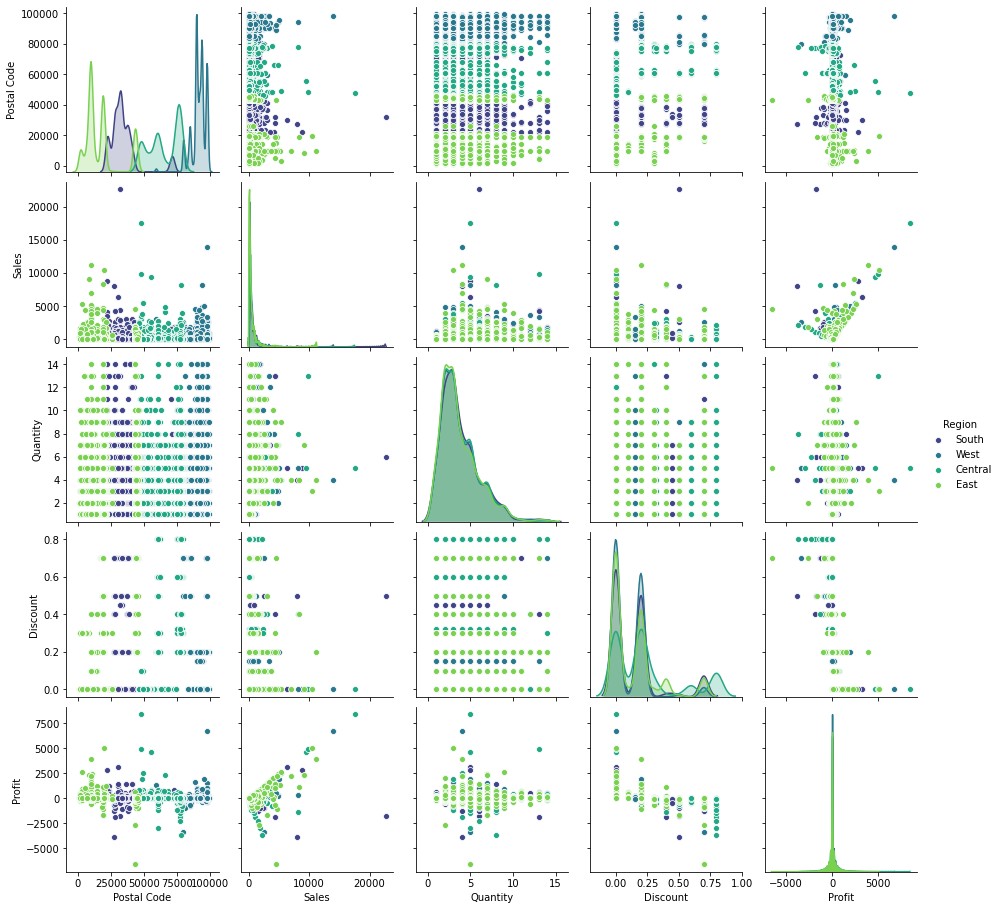

In [13]:
sns.pairplot(df, hue = 'Region', palette= 'viridis', height=2.5)
plt.show()

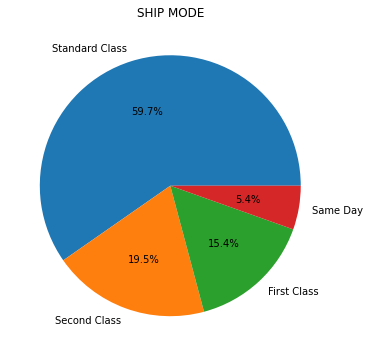

In [14]:
plt.figure(figsize = (6,6))
plt.title('SHIP MODE')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct = '%1.1f%%')
plt.show()

### We can see that 'Standard Class' is the mostly used mode for shipment and 'Same Day' is the least used mode.

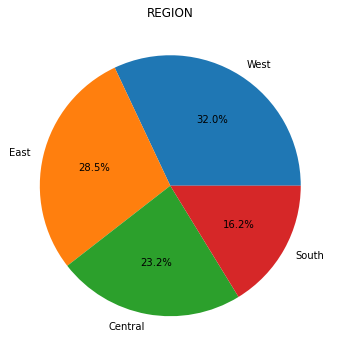

In [15]:
plt.figure(figsize = (6,6))
plt.title('REGION')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index, autopct = '%1.1f%%')
plt.show()

### The Western Region has the most number of sales

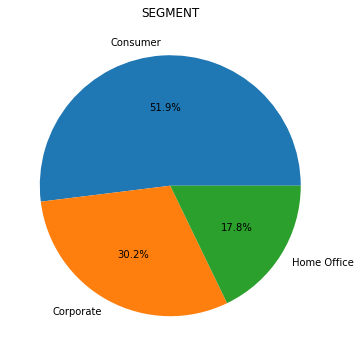

In [16]:
plt.figure(figsize = (6,6))
plt.title('SEGMENT')
plt.pie(df['Segment'].value_counts(), labels=df['Segment'].value_counts().index, autopct = '%1.1f%%')
plt.show()

### 'Consumer' is the largest segment of the business whereas 'Home Office' is the smallest.

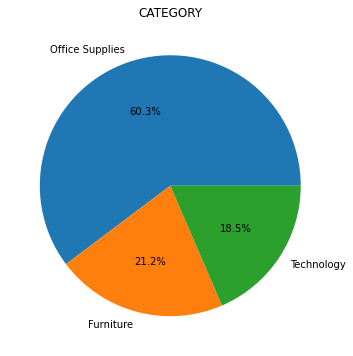

In [17]:
plt.figure(figsize = (6,6))
plt.title('CATEGORY')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct = '%1.1f%%')
plt.show()

### Office Supplies from the store are in highest demand.

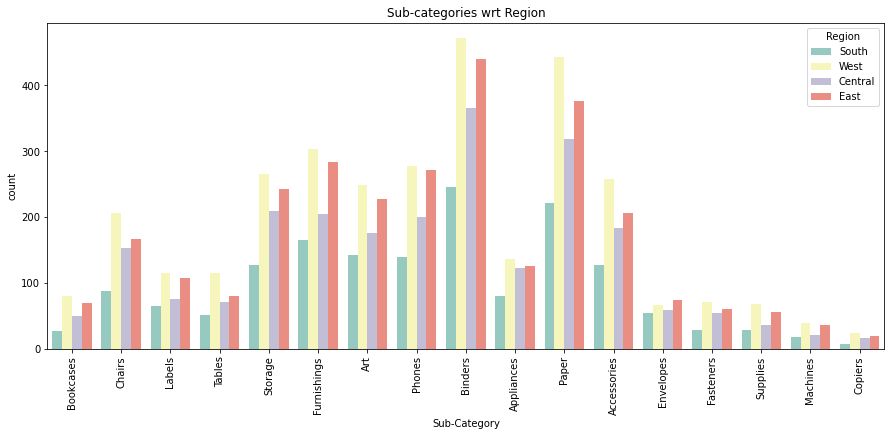

In [18]:
# Lets plot a countplot for Sub-Category and compare it with the Region of sales

plt.figure(figsize = (15,6))
plt.title('Sub-categories wrt Region')
sns.countplot(x=df['Sub-Category'], hue=df['Region'], palette = 'Set3')
plt.xticks(rotation=90)
plt.show()

#### We can notice from the graph that Binders are sold the most and Copiers are sold the least.

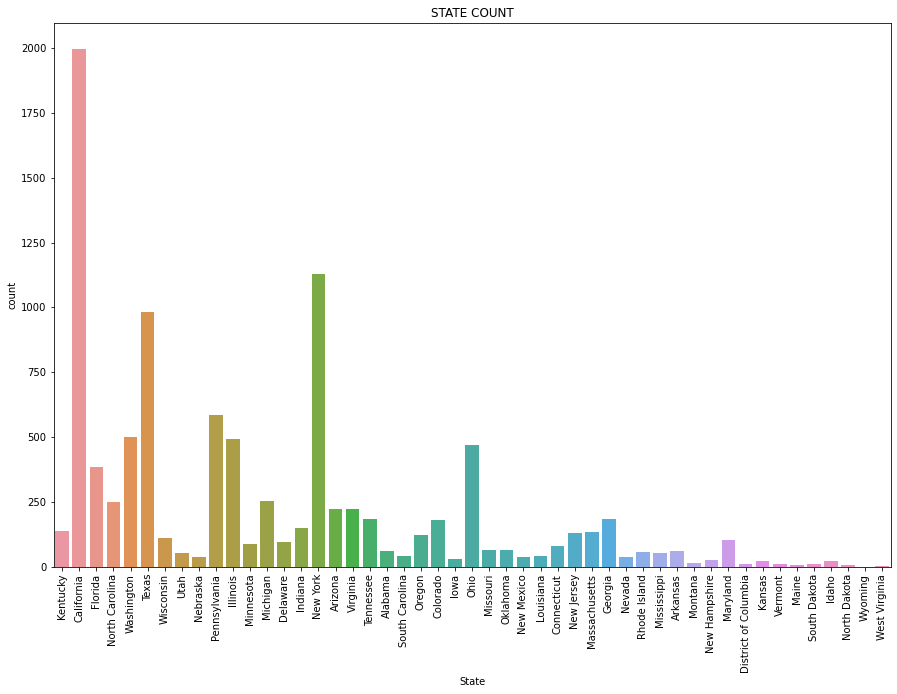

In [19]:
plt.figure(figsize=(15, 10));
sns.countplot(x=df['State'])
plt.title('STATE COUNT')
plt.xticks(rotation=90)
plt.show()

### Most sales are from California

In [20]:
df['Frequency'] = df.groupby('City')['City'].transform('count')
df1 = df.sort_values('Frequency',ascending = False).groupby('City').head(10)
df1 = df1[['City', 'Frequency']]
df1.head()

,City,Frequency
3322,New York City,914
2295,New York City,914
2153,New York City,914
2149,New York City,914
6127,New York City,914


As we can clearly see, there are duplicates. Let us drop them.

In [21]:
df1.duplicated().sum()

2565

In [22]:
df1.drop_duplicates(subset=None, keep='first', inplace=True)
df1.duplicated().sum()

0

In [23]:
df1.head()

,City,Frequency
3322,New York City,914
9234,Los Angeles,746
4404,Philadelphia,536
5820,San Francisco,506
4895,Seattle,424


Let us reset the indices of this DataFrame.

In [25]:
df1.reset_index(drop=True)

,City,Frequency
0,New York City,914
1,Los Angeles,746
2,Philadelphia,536
3,San Francisco,506
4,Seattle,424
...,...,...
526,Tinley Park,1
527,Aberdeen,1
528,Pensacola,1
529,Whittier,1


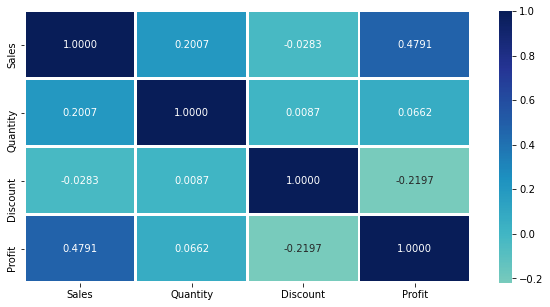

In [26]:
n_data=['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(10,5))
sns.heatmap(df[n_data].corr(),cmap = 'YlGnBu', linewidth = 2, annot=True, fmt='.4f',center=0);

##### Heatmaps help us look into which attributes are highly correlated with each other. We can see that Sales and Profit have a high positive correlation. Quantity and Discount have almost no correlation and Profit and Discount are negatively correlated.

# Insights

#### 1. The business is most successful in New York City and Los Angeles.

#### 2. The business should focus on 'Home Office' segment more possibly by providing targeted offers.

#### 3. People opting for same-day deliveries are less. Possible reasons might be higher shipping charges

#### 4. The business should focus more on increasing sales in the Southern Region.

#### 5. The businesses in Wyoming and West Virginia are drastically low.